In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/updated-dataframe-csv/updated_dataframe.csv
/kaggle/input/image-folder/images/CXR1524_IM-0339-2001.png
/kaggle/input/image-folder/images/CXR2661_IM-1142-2001.png
/kaggle/input/image-folder/images/CXR1474_IM-0307-2001.png
/kaggle/input/image-folder/images/CXR3130_IM-1472-2001.png
/kaggle/input/image-folder/images/CXR764_IM-2311-3001.png
/kaggle/input/image-folder/images/CXR2623_IM-1111-1001.png
/kaggle/input/image-folder/images/CXR1367_IM-0237-1001.png
/kaggle/input/image-folder/images/CXR1907_IM-0589-2001.png
/kaggle/input/image-folder/images/CXR3573_IM-1756-1001.png
/kaggle/input/image-folder/images/CXR1617_IM-0399-1001.png
/kaggle/input/image-folder/images/CXR1346_IM-0224-2001.png
/kaggle/input/image-folder/images/CXR1965_IM-0629-2001.png
/kaggle/input/image-folder/images/CXR435_IM-2075-1001.png
/kaggle/input/image-folder/images/CXR1774_IM-0507-2001.png
/kaggle/input/image-folder/images/CXR2903_IM-1307-1001.png
/kaggle/input/image-folder/images/CXR2422_IM-0965-1001.png


In [2]:
import pandas as pd

# Define the correct file path
file_path = "/kaggle/input/updated-dataframe-csv/updated_dataframe.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,image_id,caption,comparison,indication,findings,impression,height,width,Image_path,Resized_Image_Path,Dataset
0,CXR3380_IM-1628-2001.png,PA and lateral chest radiographs dated XXXX at...,NaN,XXXX-year-old with chest pain. Vomiting and di...,"The heart, pulmonary XXXX and mediastinum are ...",No acute cardiopulmonary disease.,224,224,/content/drive/My Drive/images/CXR3380_IM-1628...,/content/drive/My Drive/resized_images/CXR3380...,train
1,CXR2324_IM-0895-2001.png,Chest X-XXXX 2 XXXX,XXXX,pt states hx of asthma \T\ XXXX,The lungs are clear. The cardiomediastinal sil...,Negative chest .,224,224,/content/drive/My Drive/images/CXR2324_IM-0895...,/content/drive/My Drive/resized_images/CXR2324...,train
2,CXR2029_IM-0674-1001.png,"PA and Lateral Chest. XXXX, XXXX XXXX hours",None available,Chest pain,Normal heart size and mediastinal contours. No...,No acute cardiopulmonary abnormalities.,224,224,/content/drive/My Drive/images/CXR2029_IM-0674...,/content/drive/My Drive/resized_images/CXR2029...,train
3,CXR3122_IM-1467-2001.png,Xray Chest PA and Lateral,NaN,Throat pain,The cardiomediastinal silhouette is normal siz...,No acute cardiopulmonary disease. .,224,224,/content/drive/My Drive/images/CXR3122_IM-1467...,/content/drive/My Drive/resized_images/CXR3122...,train
4,CXR3069_IM-1432-1001.png,"PA and lateral views of the chest XXXX, XXXX X...",NaN,XXXX/XXXX,Right upper lobe airspace disease consistent w...,Right upper lobe pneumonia.,224,224,/content/drive/My Drive/images/CXR3069_IM-1432...,/content/drive/My Drive/resized_images/CXR3069...,train


In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# Set path to images
image_dir = '/kaggle/input/image-folder/images/'

# Get list of image filenames
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Print number of images found
print(f"Total images found: {len(image_files)}")


Total images found: 7560


In [4]:
import pandas as pd

# Load your CSV
file_path = "/kaggle/input/updated-dataframe-csv/updated_dataframe.csv"
df = pd.read_csv(file_path)

# Drop the unwanted columns
df = df.drop(columns=['Image_path', 'Resized_Image_Path', 'Dataset'])

# Create a new column with correct image path
df['New_Image_Path'] = df['image_id'].apply(lambda x: f"/kaggle/input/image-folder/images/{x}")

# Display updated dataframe
df.head()


,image_id,caption,comparison,indication,findings,impression,height,width,New_Image_Path
0,CXR3380_IM-1628-2001.png,PA and lateral chest radiographs dated XXXX at...,NaN,XXXX-year-old with chest pain. Vomiting and di...,"The heart, pulmonary XXXX and mediastinum are ...",No acute cardiopulmonary disease.,224,224,/kaggle/input/image-folder/images/CXR3380_IM-1...
1,CXR2324_IM-0895-2001.png,Chest X-XXXX 2 XXXX,XXXX,pt states hx of asthma \T\ XXXX,The lungs are clear. The cardiomediastinal sil...,Negative chest .,224,224,/kaggle/input/image-folder/images/CXR2324_IM-0...
2,CXR2029_IM-0674-1001.png,"PA and Lateral Chest. XXXX, XXXX XXXX hours",None available,Chest pain,Normal heart size and mediastinal contours. No...,No acute cardiopulmonary abnormalities.,224,224,/kaggle/input/image-folder/images/CXR2029_IM-0...
3,CXR3122_IM-1467-2001.png,Xray Chest PA and Lateral,NaN,Throat pain,The cardiomediastinal silhouette is normal siz...,No acute cardiopulmonary disease. .,224,224,/kaggle/input/image-folder/images/CXR3122_IM-1...
4,CXR3069_IM-1432-1001.png,"PA and lateral views of the chest XXXX, XXXX X...",NaN,XXXX/XXXX,Right upper lobe airspace disease consistent w...,Right upper lobe pneumonia.,224,224,/kaggle/input/image-folder/images/CXR3069_IM-1...


In [5]:
# Basic info
print(df.info())  # Check columns, non-null counts, dtypes

# Missing values
print(df.isnull().sum())  # Focus on 'findings' and 'impression' (critical for report generation)

# Duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_id        7505 non-null   object
 1   caption         7503 non-null   object
 2   comparison      5235 non-null   object
 3   indication      7346 non-null   object
 4   findings        6507 non-null   object
 5   impression      7453 non-null   object
 6   height          7505 non-null   int64 
 7   width           7505 non-null   int64 
 8   New_Image_Path  7505 non-null   object
dtypes: int64(2), object(7)
memory usage: 527.8+ KB
None
image_id             0
caption              2
comparison        2270
indication         159
findings           998
impression          52
height               0
width                0
New_Image_Path       0
dtype: int64
Duplicate rows: 35
image_id: 7470 unique values
caption: 696 unique values
comparison: 393 unique values
indication: 2454 unique valu

In [6]:
# Drop the specified columns
df = df.drop(columns=['caption', 'comparison', 'indication'])

# Verify remaining columns
print(df.columns)

Index(['image_id', 'findings', 'impression', 'height', 'width',
       'New_Image_Path'],
      dtype='object')


In [7]:
# Drop rows with null 'impression' (since they're unusable for report generation)
df = df.dropna(subset=['impression'])
# Merge 'impression' and 'findings' (only add findings if not null)
df['report'] = df['impression'] + ' ' + df['findings'].fillna('')

# Trim any extra whitespace
df['report'] = df['report'].str.strip()

# Display sample
df[['impression', 'findings', 'report']].head()

,impression,findings,report
0,No acute cardiopulmonary disease.,"The heart, pulmonary XXXX and mediastinum are ...","No acute cardiopulmonary disease. The heart, p..."
1,Negative chest .,The lungs are clear. The cardiomediastinal sil...,Negative chest . The lungs are clear. The card...
2,No acute cardiopulmonary abnormalities.,Normal heart size and mediastinal contours. No...,No acute cardiopulmonary abnormalities. Normal...
3,No acute cardiopulmonary disease. .,The cardiomediastinal silhouette is normal siz...,No acute cardiopulmonary disease. . The cardio...
4,Right upper lobe pneumonia.,Right upper lobe airspace disease consistent w...,Right upper lobe pneumonia. Right upper lobe a...


Nulls in 'report': 0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


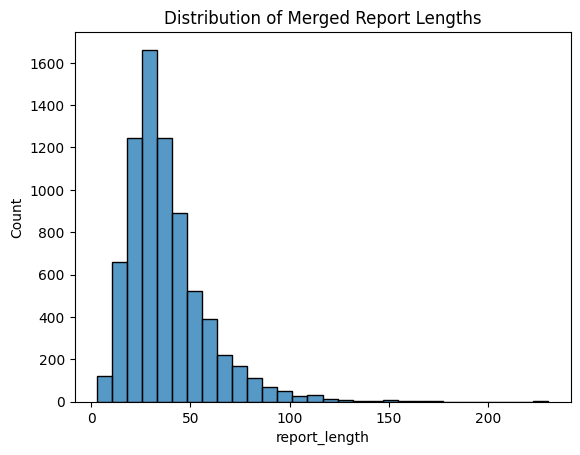

In [8]:
import seaborn as sns
# Check for nulls in 'report' (should be zero)
print(f"Nulls in 'report': {df['report'].isnull().sum()}")

# Check merged text length distribution
df['report_length'] = df['report'].str.split().str.len()
sns.histplot(df['report_length'], bins=30)
plt.title("Distribution of Merged Report Lengths")
plt.show()

In [9]:
df = df.drop_duplicates(subset=['report','image_id'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


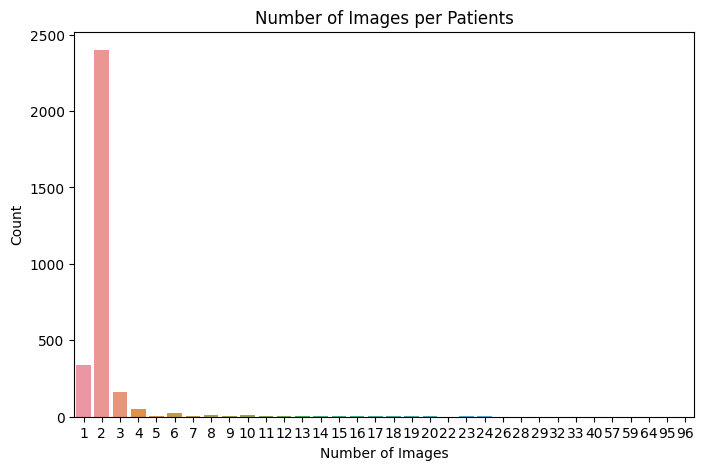

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by report ID (or patient ID if available) and count number of images per report
# If you have 'study_id', 'patient_id', or similar, replace 'report' with that column
images_per_report = df.groupby('report')['image_id'].count()

# Convert to list and plot
plt.figure(figsize=(8, 5))
sns.countplot(x=list(images_per_report))
plt.title("Number of Images per Patients")
plt.xlabel("Number of Images")
plt.ylabel("Count")
plt.show()


In [11]:
import pandas as pd

# Group by report and collect all image paths
patient_images_df = df.groupby('report')['New_Image_Path'].apply(list).reset_index()

# Rename columns for clarity
patient_images_df.columns = ['report', 'image_paths']

# Add count of images for each patient
patient_images_df['num_images'] = patient_images_df['image_paths'].apply(len)

# Display the resulting DataFrame
print(patient_images_df.head())

# Optional: Save to CSV
patient_images_df.to_csv('patients_with_images.csv', index=False)

                                              report  \
0  1 cm nodule within the lung base, seen only on...   
1  1 cm of apical opacity, scarring versus nodule...   
2  1. 6 mm left lung nodular opacity. Recommend c...   
3  1. 7mm non calcified nodule, XXXX in appearanc...   
4  1. 8 mm left midlung nodule. XXXX since XXXX. ...   

                                         image_paths  num_images  
0  [/kaggle/input/image-folder/images/CXR2119_IM-...           2  
1  [/kaggle/input/image-folder/images/CXR189_IM-0...           2  
2  [/kaggle/input/image-folder/images/CXR3794_IM-...           2  
3  [/kaggle/input/image-folder/images/CXR3393_IM-...           2  
4  [/kaggle/input/image-folder/images/CXR3232_IM-...           2  


In [12]:
# Step 1: Filter to keep only reports with 10 or fewer images
valid_reports = patient_images_df[patient_images_df['num_images'] <= 10]['report']

# Step 2: Filter the main DataFrame `df` to keep only those valid reports
df = df[df['report'].isin(valid_reports)]

# Optional: Reset index
df.reset_index(drop=True, inplace=True)

# Step 3: Also update `patient_images_df` to reflect this change
patient_images_df = patient_images_df[patient_images_df['num_images'] <= 10].reset_index(drop=True)

# Check the number of remaining patients
print(f"Number of patients after filtering: {len(patient_images_df)}")


Number of patients after filtering: 3015


In [13]:
import pandas as pd

# Group by report and collect all image paths
patient_images_df = df.groupby('report')['New_Image_Path'].apply(list).reset_index()

# Rename columns for clarity
patient_images_df.columns = ['report', 'image_paths']

# Truncate image lists to maximum 5 images
patient_images_df['image_paths'] = patient_images_df['image_paths'].apply(lambda x: x[:5])

# Update the image count column
patient_images_df['num_images'] = patient_images_df['image_paths'].apply(len)

# Display the resulting DataFrame
print(patient_images_df.head())

# Show distribution of image counts after truncation
print("\nImage count distribution after limiting to max 5 images:")
print(patient_images_df['num_images'].value_counts().sort_index())

# Optional: Save to CSV
patient_images_df.to_csv('patients_with_max5_images.csv', index=False)

                                              report  \
0  1 cm nodule within the lung base, seen only on...   
1  1 cm of apical opacity, scarring versus nodule...   
2  1. 6 mm left lung nodular opacity. Recommend c...   
3  1. 7mm non calcified nodule, XXXX in appearanc...   
4  1. 8 mm left midlung nodule. XXXX since XXXX. ...   

                                         image_paths  num_images  
0  [/kaggle/input/image-folder/images/CXR2119_IM-...           2  
1  [/kaggle/input/image-folder/images/CXR189_IM-0...           2  
2  [/kaggle/input/image-folder/images/CXR3794_IM-...           2  
3  [/kaggle/input/image-folder/images/CXR3393_IM-...           2  
4  [/kaggle/input/image-folder/images/CXR3232_IM-...           2  

Image count distribution after limiting to max 5 images:
num_images
1     341
2    2399
3     159
4      51
5      65
Name: count, dtype: int64


In [14]:
# Count number of reports with exactly 5 images
num_reports_with_5_images = patient_images_df[patient_images_df['num_images'] <=5].shape[0]

print(f"Number of reports with exactly 5 images: {num_reports_with_5_images}")


Number of reports with exactly 5 images: 3015


In [15]:
patient_images_df

,report,image_paths,num_images
0,"1 cm nodule within the lung base, seen only on...",[/kaggle/input/image-folder/images/CXR2119_IM-...,2
1,"1 cm of apical opacity, scarring versus nodule...",[/kaggle/input/image-folder/images/CXR189_IM-0...,2
2,1. 6 mm left lung nodular opacity. Recommend c...,[/kaggle/input/image-folder/images/CXR3794_IM-...,2
3,"1. 7mm non calcified nodule, XXXX in appearanc...",[/kaggle/input/image-folder/images/CXR3393_IM-...,2
4,1. 8 mm left midlung nodule. XXXX since XXXX. ...,[/kaggle/input/image-folder/images/CXR3232_IM-...,2
...,...,...,...
3010,heart size normal. Emphysema. Biapical scarrin...,[/kaggle/input/image-folder/images/CXR2234_IM-...,2
3011,heart size normal. Lungs are clear. Bilateral ...,[/kaggle/input/image-folder/images/CXR2927_IM-...,2
3012,heart size normal. Lungs clear. Calcified 5 mm...,[/kaggle/input/image-folder/images/CXR2574_IM-...,2
3013,no cardiomegaly with bilateral small pleural e...,[/kaggle/input/image-folder/images/CXR546_IM-2...,2


In [16]:
!pip install torch torchvision transformers pandas numpy Pillow datasets

In [17]:
!pip install --upgrade nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.translate.meteor_score import meteor_score

try:
    from nltk.translate.meteor_score import meteor_score
except ImportError:
    # Define dummy meteor_score if not available
    def meteor_score(references, hypothesis):
        return 0.0
    print("METEOR score not available - using dummy function")

from nltk.translate import meteor_score

from nltk.translate.meteor_score import meteor_score

!pip install rouge

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.1 MB/s eta 0:00:0000:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [19]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import pandas as pd
import os
import re
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
from rouge import Rouge
from sklearn.model_selection import train_test_split

def clean_report(text):
    """
    Clean and preprocess radiology report text.
    
    Args:
        text: Raw report text
        
    Returns:
        Cleaned text with standardized formatting
    """
    if pd.isna(text):
        return ""
    
    # Convert to string if not already
    text = str(text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Standardize some common terms
    text = text.replace('right upper lobe', 'RUL')
    text = text.replace('right middle lobe', 'RML')
    text = text.replace('right lower lobe', 'RLL')
    text = text.replace('left upper lobe', 'LUL')
    text = text.replace('left lower lobe', 'LLL')
    
    # Fix spacing after periods
    text = re.sub(r'\.(?! )', '. ', text)
    
    return text.strip()

def calculate_metrics(references, hypotheses):
    """
    Calculate BLEU, METEOR, and ROUGE scores for text generation evaluation.
    
    Args:
        references: List of reference (ground truth) texts
        hypotheses: List of generated texts
    
    Returns:
        Dictionary of evaluation metrics
    """
    # Tokenize references and hypotheses for BLEU calculation
    tokenized_refs = []
    for ref in references:
        # Tokenize and create list of tokens (BLEU expects list of lists)
        tokenized_refs.append([ref.split()])
    
    tokenized_hyps = []
    for hyp in hypotheses:
        # Tokenize hypothesis
        tokenized_hyps.append(hyp.split())
    
    # Calculate BLEU scores
    bleu1 = corpus_bleu(tokenized_refs, tokenized_hyps, weights=(1, 0, 0, 0))
    bleu4 = corpus_bleu(tokenized_refs, tokenized_hyps, weights=(0.25, 0.25, 0.25, 0.25))
    
    # Calculate METEOR score
    meteor_scores = []
    for ref, hyp in zip(references, hypotheses):
        if hyp.strip():  # Skip empty hypotheses
            meteor_scores.append(meteor_score([ref.split()], hyp.split()))
    meteor_avg = np.mean(meteor_scores) if meteor_scores else 0
    
    # Calculate ROUGE score
    rouge = Rouge()
    try:
        # Filter out empty strings which will cause Rouge to error
        valid_pairs = [(r, h) for r, h in zip(references, hypotheses) 
                        if len(r.strip()) > 0 and len(h.strip()) > 0]
        
        if valid_pairs:
            valid_refs, valid_hyps = zip(*valid_pairs)
            rouge_scores = rouge.get_scores(valid_hyps, valid_refs, avg=True)
            rouge1_f = rouge_scores['rouge-1']['f']
            rougeL_f = rouge_scores['rouge-l']['f']
        else:
            rouge1_f = 0
            rougeL_f = 0
    except Exception as e:
        print(f"ROUGE calculation error: {e}")
        rouge1_f = 0
        rougeL_f = 0
    
    return {
        'bleu1': bleu1,
        'bleu4': bleu4,
        'meteor': meteor_avg,
        'rouge1': rouge1_f,
        'rougeL': rougeL_f
    }

class ViTEncoder(nn.Module):
    """
    Vision Transformer (ViT) encoder for image feature extraction.
    This is a simplified implementation for encoding X-ray images.
    """
    def __init__(self, img_size=224, patch_size=16, in_channels=3, 
                 embed_dim=768, num_layers=12, num_heads=12, 
                 mlp_dim=3072, dropout=0.1):
        super().__init__()
        
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2
        self.embed_dim = embed_dim
        
        # Patch embedding
        self.patch_embedding = nn.Conv2d(
            in_channels, embed_dim, kernel_size=patch_size, stride=patch_size
        )
        
        # Class token and position embeddings
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.position_embedding = nn.Parameter(
            torch.zeros(1, self.num_patches + 1, embed_dim)
        )
        
        # Transformer encoder layers
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=mlp_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer=encoder_layer,
            num_layers=num_layers
        )
        
        # Layer normalization
        self.norm = nn.LayerNorm(embed_dim)
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        """Initialize weights for the ViT encoder"""
        # Initialize token and position embeddings
        nn.init.normal_(self.cls_token, std=0.02)
        nn.init.normal_(self.position_embedding, std=0.02)
        
        # Initialize conv layer
        nn.init.normal_(self.patch_embedding.weight, std=0.02)
        nn.init.zeros_(self.patch_embedding.bias)
        
    def forward(self, x):
        """
        Forward pass of the ViT encoder
        
        Args:
            x: Input images [batch_size, channels, height, width]
            
        Returns:
            encoder_output: Output features [batch_size, num_patches+1, embed_dim]
        """
        batch_size = x.shape[0]
        
        # Extract patches
        x = self.patch_embedding(x)  # [batch_size, embed_dim, grid_h, grid_w]
        x = x.flatten(2).transpose(1, 2)  # [batch_size, num_patches, embed_dim]
        
        # Add class token
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)  # [batch_size, num_patches+1, embed_dim]
        
        # Add position embeddings
        x = x + self.position_embedding
        
        # Apply transformer encoder
        x = self.transformer_encoder(x)
        
        # Apply layer norm
        x = self.norm(x)
        
        return x

class ImageFusionModule(nn.Module):
    """
    Module to fuse features from multiple images using self-attention.
    """
    def __init__(self, embed_dim=768, max_images=3, num_heads=8, dropout=0.12):
        super().__init__()
        
        self.embed_dim = embed_dim
        self.max_images = max_images
        
        # Self-attention to fuse the multiple image features
        self.image_self_attention = nn.MultiheadAttention(
            embed_dim=embed_dim,
            num_heads=num_heads,
            dropout=dropout,
            batch_first=True
        )
        
        # Feed forward network for fusion
        self.fusion_ffn = nn.Sequential(
            nn.Linear(embed_dim, embed_dim * 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(embed_dim * 2, embed_dim)
        )
        
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        
    def forward(self, image_features):
        """
        Fuse features from multiple images
        
        Args:
            image_features: Tensor [batch_size, num_images, num_patches+1, embed_dim]
                            Contains features for multiple images
        
        Returns:
            fused_features: Tensor [batch_size, num_patches+1, embed_dim]
                            Fused features across images
        """
        batch_size, num_images, seq_len, embed_dim = image_features.shape
        
        # Reshape to merge batch and image dimensions
        # We'll treat each image in the batch as a separate instance for attention
        # [batch_size * num_images, seq_len, embed_dim]
        flat_features = image_features.view(-1, seq_len, embed_dim)
        
        # Get average feature across all images for each batch
        # This serves as our initial fused representation
        fused_features = image_features.mean(dim=1)  # [batch_size, seq_len, embed_dim]
        
        # Apply self-attention to fused features
        # Query is the fused features, while keys and values are all image features
        # We need to repeat fused_features for each image
        fused_queries = fused_features.unsqueeze(1).repeat(1, num_images, 1, 1)
        fused_queries = fused_queries.view(-1, seq_len, embed_dim)
        
        # Apply attention and residual connection
        attn_output, _ = self.image_self_attention(
            query=fused_queries,
            key=flat_features,
            value=flat_features
        )
        
        # Reshape back to [batch_size, num_images, seq_len, embed_dim]
        attn_output = attn_output.view(batch_size, num_images, seq_len, embed_dim)
        
        # Average across images to get final fused representation
        fused_features = attn_output.mean(dim=1)  # [batch_size, seq_len, embed_dim]
        
        # Add residual connection and layer norm
        fused_features = self.norm1(fused_features)
        
        # Apply FFN
        ffn_output = self.fusion_ffn(fused_features)
        
        # Add residual connection and layer norm
        fused_features = fused_features + ffn_output
        fused_features = self.norm2(fused_features)
        
        return fused_features

class XRayReportGeneratorWithBART(nn.Module):
    def __init__(self, 
                 image_size=224, 
                 patch_size=16, 
                 in_channels=3,
                 embed_dim=768,
                 encoder_layers=12,
                 num_heads=8,
                 mlp_dim=3072,
                 dropout=0.1,
                 max_images=5,
                 bart_model_name="facebook/bart-base"):
        super().__init__()
        self.image_size = image_size
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.max_images = max_images
        
        # Initialize Vision Transformer Encoder (shared across all images)
        self.vit_encoder = ViTEncoder(
            img_size=image_size,
            patch_size=patch_size,
            in_channels=in_channels,
            embed_dim=embed_dim,
            num_layers=encoder_layers,
            num_heads=num_heads,
            mlp_dim=mlp_dim,
            dropout=dropout
        )
        
        # Image Feature Fusion Layer
        self.image_fusion = ImageFusionModule(
            embed_dim=embed_dim,
            max_images=max_images,
            num_heads=num_heads,
            dropout=dropout
        )
        
        # Load pre-trained BART model
        self.bart = BartForConditionalGeneration.from_pretrained(bart_model_name)
        
        # Feature projection layer to map ViT features to BART encoder dimensions
        self.feature_projection = nn.Linear(embed_dim, self.bart.config.d_model)
        
    def forward(self, images_batch, decoder_input_ids, decoder_attention_mask=None):
        """
        Forward pass of the model:
        1. Encode images with ViT
        2. Fuse multiple images
        3. Project features to BART encoder dimension
        4. Feed to BART decoder
        
        Args:
            images_batch: Tensor [batch_size, num_images, 3, image_size, image_size]
            decoder_input_ids: Input token IDs for the BART decoder
            decoder_attention_mask: Attention mask for decoder input
            
        Returns:
            outputs: BART decoder outputs
        """
        batch_size = images_batch.size(0)
        max_images_in_batch = images_batch.size(1)
        
        # Process all images with the ViT encoder
        flat_images = images_batch.view(-1, 3, self.image_size, self.image_size)
        flat_features = self.vit_encoder(flat_images)  # [batch_size * num_images, 197, embed_dim]
        
        # Reshape back to [batch_size, num_images, 197, embed_dim]
        image_features = flat_features.view(batch_size, max_images_in_batch, 197, self.embed_dim)
        
        # Fuse features from multiple images
        fused_features = self.image_fusion(image_features)  # [batch_size, 197, embed_dim]
        
        # Project ViT features to BART encoder dimension space
        projected_features = self.feature_projection(fused_features)  # [batch_size, 197, d_model]

        
        from transformers.modeling_outputs import BaseModelOutput
        encoder_outputs = BaseModelOutput(last_hidden_state=projected_features)
    
        # Use projected features as encoder_hidden_states for BART
        bart_outputs = self.bart(
            input_ids=None,  # No encoder input_ids, using visual features instead
            encoder_outputs=encoder_outputs,  # Use projected image features as encoder outputs
            decoder_input_ids=decoder_input_ids,
            decoder_attention_mask=decoder_attention_mask,
            return_dict=True
        )
        
        return bart_outputs
    
    def generate(self, images_batch, tokenizer, max_length=100, num_beams=4, 
                 early_stopping=True, no_repeat_ngram_size=2):
        """
        Generate text reports for the given images using beam search.
        
        Args:
            images_batch: Tensor of shape [batch_size, num_images, 3, image_size, image_size]
            tokenizer: BART tokenizer
            max_length: Maximum length of generated sequence
            num_beams: Number of beams for beam search
            early_stopping: Whether to stop beam search when at least num_beams sentences are finished
            no_repeat_ngram_size: If > 0, prevent repetition of ngrams with this size
            
        Returns:
            generated_text: List of generated reports
        """
        batch_size = images_batch.size(0)
        device = images_batch.device
        
        # Process images with the ViT encoder and fuse features
        max_images_in_batch = images_batch.size(1)
        flat_images = images_batch.view(-1, 3, self.image_size, self.image_size)
        flat_features = self.vit_encoder(flat_images)
        image_features = flat_features.view(batch_size, max_images_in_batch, 197, self.embed_dim)
        fused_features = self.image_fusion(image_features)
        
        # Project features to BART encoder dimension space
        projected_features = self.feature_projection(fused_features)
        # Create a proper encoder outputs object
        from transformers.modeling_outputs import BaseModelOutput
        encoder_outputs = BaseModelOutput(last_hidden_state=projected_features)
    
        # Generate text using BART's generation method with projected image features
        output_ids = self.bart.generate(
            encoder_outputs=encoder_outputs,
            max_length=max_length,
            num_beams=num_beams,
            early_stopping=early_stopping,
            no_repeat_ngram_size=no_repeat_ngram_size
        )
        
        # Convert token IDs to text
        generated_text = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        
        return generated_text

class MultiImageXRayDatasetForBART(torch.utils.data.Dataset):
    def __init__(self, patient_images_df, tokenizer, transform=None, max_seq_len=256, max_images=5):
        """
        Dataset for multi-image X-ray reports using BART tokenizer.
        
        Args:
            patient_images_df: DataFrame with columns 'report', 'image_paths', etc.
            tokenizer: BART tokenizer
            transform: Image transforms
            max_seq_len: Maximum sequence length for tokenization
            max_images: Maximum number of images per patient
        """
        self.data = patient_images_df
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len
        self.max_images = max_images
        
        # Image transformation
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # Get patient data
        row = self.data.iloc[idx]
        report = row['clean_report']
        image_paths = row['image_paths']
        
        # Limit to max_images
        num_images = min(len(image_paths), self.max_images)
        image_paths = image_paths[:num_images]
        
        # Load all images
        images = []
        for img_path in image_paths:
            try:
                image = Image.open(img_path).convert('RGB')
                image = self.transform(image)
                images.append(image)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                # Append a blank image as a placeholder
                images.append(torch.zeros(3, 224, 224))
        
        # Pad with zeros if fewer than max_images
        while len(images) < self.max_images:
            images.append(torch.zeros(3, 224, 224))
        
        # Stack all images into a single tensor
        images = torch.stack(images)  # [num_images, 3, 224, 224]
        
        # Tokenize report - BART uses different tokenization style than BERT
        encoding = self.tokenizer(
            report,
            padding='max_length',
            truncation=True,
            max_length=self.max_seq_len,
            return_tensors='pt'
        )
        
        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)
        
        return {
            'images': images,
            'num_images': num_images,
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'report': report
        }

def collate_fn_bart(batch):
    """
    Custom collate function for BART-based model.
    """
    images = torch.stack([item['images'] for item in batch])
    input_ids = torch.stack([item['input_ids'] for item in batch])
    attention_mask = torch.stack([item['attention_mask'] for item in batch])
    num_images = torch.tensor([item['num_images'] for item in batch])
    reports = [item['report'] for item in batch]
    
    return {
        'images': images,
        'num_images': num_images,
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'report': reports
    }

def train_bart_model_with_improvements(model, train_loader, optimizer, device, epochs=5, 
                    val_loader=None, tokenizer=None, checkpoint_path='best_bart_model.pt',
                    lr_scheduler=None, clip_grad_norm=1.0, early_stopping_patience=5):
    """
    Improved training function with gradient clipping, learning rate scheduling,
    and early stopping to improve model performance.
    Modified to display 3 full reports after each epoch.
    """
    model.train()
    best_val_loss = float('inf')
    best_bleu4 = 0.0
    patience_counter = 0
    
    for epoch in range(epochs):  # Changed to 5 epochs as requested
        model.train()
        epoch_loss = 0
        
        # Training loop
        for batch_idx, batch in enumerate(train_loader):
            # Get data from batch
            images = batch['images'].to(device)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            # BART expects special format for training
            # Use input_ids as decoder input (shifted right)
            decoder_input_ids = model.bart.prepare_decoder_input_ids_from_labels(input_ids)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(
                images_batch=images,
                decoder_input_ids=decoder_input_ids,
                decoder_attention_mask=attention_mask
            )
            
            # BART returns loss directly when labels are provided
            logits = outputs.logits
            
            # Calculate loss using BART's internal loss calculation
            # Shift labels because BART already shifts internally
            labels = input_ids
            
            # Use label smoothing to improve generalization
            loss_fct = nn.CrossEntropyLoss(
                ignore_index=tokenizer.pad_token_id,
                label_smoothing=0.1  # Add label smoothing
            )
            loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad_norm)
            
            optimizer.step()
            
            epoch_loss += loss.item()
            
            # Print progress every 10 batches
            if (batch_idx + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Batch {batch_idx+1}/{len(train_loader)}, Loss: {loss.item():.4f}")
        
        # Step the learning rate scheduler if provided
        if lr_scheduler is not None:
            lr_scheduler.step()
        
        avg_train_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}")
        
        # Validation
        if val_loader is not None and tokenizer is not None:
            val_loss, generated, reference = evaluate_bart_model_with_metrics_and_display(
                model, val_loader, tokenizer, device, num_examples=3
            )
            
            print(f"Validation Loss: {val_loss:.4f}")
            
            # Calculate metrics
            metrics = calculate_metrics(reference, generated)
            bleu4 = metrics['bleu4']
            
            print(f"BLEU-1: {metrics['bleu1']:.4f}, BLEU-4: {bleu4:.4f}")
            print(f"METEOR: {metrics['meteor']:.4f}")
            print(f"ROUGE-1: {metrics['rouge1']:.4f}, ROUGE-L: {metrics['rougeL']:.4f}")
            
            # Save best model (using combined metric of val_loss and BLEU-4)
            improved = False
            
            # First check if we have a new best BLEU-4 score
            if bleu4 > best_bleu4:
                best_bleu4 = bleu4
                improved = True
                print(f"New best BLEU-4: {best_bleu4:.4f}")
            
            # Also check for best validation loss
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                improved = True
                print(f"New best validation loss: {best_val_loss:.4f}")
            
            if improved:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'val_loss': val_loss,
                    'bleu4': bleu4,
                }, checkpoint_path)
                print(f"Model saved to {checkpoint_path}")
                patience_counter = 0
            else:
                patience_counter += 1
                print(f"No improvement for {patience_counter} epochs")
                
                # Early stopping
                if patience_counter >= early_stopping_patience:
                    print(f"Early stopping after {epoch+1} epochs")
                    break
    
    return model

def evaluate_bart_model_with_metrics_and_display(model, val_loader, tokenizer, device, num_examples=3):
    """
    Evaluate the BART-based model on validation data with detailed metrics.
    Also display full reports for the first num_examples.
    """
    model.eval()
    val_loss = 0
    generated_reports = []
    reference_reports = []
    
    # For displaying examples
    samples_to_display = []
    remaining_examples = num_examples
    
    with torch.no_grad():
        for batch in val_loader:
            images = batch['images'].to(device)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            reports = batch['report']
            
            # Calculate validation loss
            decoder_input_ids = model.bart.prepare_decoder_input_ids_from_labels(input_ids)
            outputs = model(images, decoder_input_ids, attention_mask)
            
            logits = outputs.logits
            labels = input_ids
            loss_fct = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
            loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))
            
            val_loss += loss.item()
            
            # Generate reports using beam search with improved parameters
            generated = model.generate(
                images, 
                tokenizer, 
                max_length=150,
                num_beams=5,
                early_stopping=True,
                no_repeat_ngram_size=3
            )
            
            # Store for metrics calculation
            generated_reports.extend(generated)
            reference_reports.extend(reports)
            
            # Add samples to display list
            if remaining_examples > 0:
                for i in range(min(remaining_examples, len(generated))):
                    samples_to_display.append({
                        'reference': reports[i],
                        'generated': generated[i]
                    })
                    remaining_examples -= 1
    
    avg_val_loss = val_loss / len(val_loader)
    
    # Display the full reports for our samples
    print("\n" + "="*90)
    print("REPORT EXAMPLES:")
    print("="*90)
    for i, sample in enumerate(samples_to_display):
        print(f"\nEXAMPLE {i+1}:")
        print("-"*90)
        print(f"REFERENCE REPORT (FULL):\n{sample['reference']}")
        print("-"*90)
        print(f"GENERATED REPORT (FULL):\n{sample['generated']}")
        print("="*90)
    
    return avg_val_loss, generated_reports, reference_reports

def main_with_improvements():
    # 0. Set device and seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # 1. Load data
    try:
        patient_images_df = pd.read_csv('patients_with_max5_images.csv')
        
        # Convert string representation of lists to actual lists
        def parse_image_paths(paths_str):
            # Remove brackets and split by comma
            if isinstance(paths_str, str):
                # Clean the string and handle potential quotes
                paths_str = paths_str.strip('[]').replace("'", "").replace('"', '')
                paths = [p.strip() for p in paths_str.split(',') if p.strip()]
                return paths
            return []
        
        patient_images_df['image_paths'] = patient_images_df['image_paths'].apply(parse_image_paths)
        
    except Exception as e:
        print(f"Error loading data: {e}")
        print("Preprocessed data not found. Please prepare your data first.")
        return
    
    # Clean reports
    patient_images_df['clean_report'] = patient_images_df['report'].apply(clean_report)
    
    # 2. Create train/val/test splits
    train_df, temp_df = train_test_split(patient_images_df, test_size=0.3, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
    
    print(f"Train samples: {len(train_df)}")
    print(f"Validation samples: {len(val_df)}")
    print(f"Test samples: {len(test_df)}")
    
    # 3. Load BART tokenizer
    tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")
    
    # Ensure BART has special tokens needed for medical domain (optional)
    special_tokens = {
        'additional_special_tokens': [
            '[CHEST]', '[FINDINGS]', '[IMPRESSION]', 
            '[LUNGS]', '[HEART]', '[PLEURA]'
        ]
    }
    tokenizer.add_special_tokens(special_tokens)
    
    # 4. Create datasets
    max_images = 5  # Define max_images here
    train_dataset = MultiImageXRayDatasetForBART(
        train_df, 
        tokenizer=tokenizer,
        max_images=max_images
    )
    val_dataset = MultiImageXRayDatasetForBART(
        val_df,
        tokenizer=tokenizer,
        max_images=max_images
    )
    test_dataset = MultiImageXRayDatasetForBART(
        test_df,
        tokenizer=tokenizer,
        max_images=max_images
    )
    
    # 5. Create data loaders
    batch_size = 4  # Adjust based on GPU memory
    num_workers = 4  # Adjust based on your CPU cores
    
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        collate_fn=collate_fn_bart,
        pin_memory=True
    )
    
    val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        collate_fn=collate_fn_bart,
        pin_memory=True
    )
    
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        collate_fn=collate_fn_bart,
        pin_memory=True
    )
    
    # 6. Initialize model
    model = XRayReportGeneratorWithBART(
        image_size=224,
        patch_size=16,
        in_channels=3,
        embed_dim=768,
        encoder_layers=12,
        num_heads=8,
        mlp_dim=3072,
        dropout=0.1,
        max_images=max_images,
        bart_model_name="facebook/bart-base"
    )
    
    # Resize the token embeddings for BART if we added custom tokens
    model.bart.resize_token_embeddings(len(tokenizer))
    
    # Move model to device
    model = model.to(device)
    
    # 7. Initialize optimizer with weight decay
    from torch.optim import AdamW
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
    
    # 8. Learning rate scheduler
    from torch.optim.lr_scheduler import CosineAnnealingLR
    scheduler = CosineAnnealingLR(optimizer, T_max=5, eta_min=1e-6)
    
    # 9. Train model with improvements
    print("Starting training...")
    train_bart_model_with_improvements(
        model=model,
        train_loader=train_loader,
        optimizer=optimizer,
        device=device,
        epochs=5,  # Run for only 5 epochs as requested
        val_loader=val_loader,
        tokenizer=tokenizer,
        checkpoint_path='best_bart_model.pt',
        lr_scheduler=scheduler,
        clip_grad_norm=1.0,
        early_stopping_patience=5
    )
    
    # 10. Evaluate on test set
    print("\nEvaluating on test set...")
    model.load_state_dict(torch.load('best_bart_model.pt')['model_state_dict'])
    test_loss, test_generated, test_reference = evaluate_bart_model_with_metrics_and_display(
        model, test_loader, tokenizer, device, num_examples=3
    )
    
    # Calculate metrics on test set
    test_metrics = calculate_metrics(test_reference, test_generated)
    
    print(f"\nTest Results:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"BLEU-1: {test_metrics['bleu1']:.4f}")
    print(f"BLEU-4: {test_metrics['bleu4']:.4f}")
    print(f"METEOR: {test_metrics['meteor']:.4f}")
    print(f"ROUGE-1: {test_metrics['rouge1']:.4f}")
    print(f"ROUGE-L: {test_metrics['rougeL']:.4f}")
    
    print("\nTraining and evaluation complete!")


if __name__ == "__main__":
    main_with_improvements()

Using device: cuda
Train samples: 2110
Validation samples: 452
Test samples: 453


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Starting training...
Epoch 1/5, Batch 10/528, Loss: 8.4087
Epoch 1/5, Batch 20/528, Loss: 7.6427
Epoch 1/5, Batch 30/528, Loss: 7.6503
Epoch 1/5, Batch 40/528, Loss: 7.5399
Epoch 1/5, Batch 50/528, Loss: 7.0586
Epoch 1/5, Batch 60/528, Loss: 6.8645
Epoch 1/5, Batch 70/528, Loss: 7.4871
Epoch 1/5, Batch 80/528, Loss: 6.4950
Epoch 1/5, Batch 90/528, Loss: 6.4683
Epoch 1/5, Batch 100/528, Loss: 6.8681
Epoch 1/5, Batch 110/528, Loss: 6.8719
Epoch 1/5, Batch 120/528, Loss: 7.2081
Epoch 1/5, Batch 130/528, Loss: 6.4544
Epoch 1/5, Batch 140/528, Loss: 6.0217
Epoch 1/5, Batch 150/528, Loss: 5.7767
Epoch 1/5, Batch 160/528, Loss: 4.8004
Epoch 1/5, Batch 170/528, Loss: 4.6985
Epoch 1/5, Batch 180/528, Loss: 3.7911
Epoch 1/5, Batch 190/528, Loss: 4.4994
Epoch 1/5, Batch 200/528, Loss: 4.2135
Epoch 1/5, Batch 210/528, Loss: 3.8333
Epoch 1/5, Batch 220/528, Loss: 4.0428
Epoch 1/5, Batch 230/528, Loss: 4.6049
Epoch 1/5, Batch 240/528, Loss: 4.0279
Epoch 1/5, Batch 250/528, Loss: 3.9040
Epoch 1/5, Ba

<ipython-input-19-f3764a14c314>:848: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_bart_model.pt')['model_state_dict'])



REPORT EXAMPLES:

EXAMPLE 1:
------------------------------------------------------------------------------------------
REFERENCE REPORT (FULL):
1. No focal air space consolidation. 2. Nodular opacity at the left apex may be exaggerated by overlapping bone silhouettes. XXXX chest may provide further evaluation, if warranted. The cardiomediastinal silhouette is normal in size and contour. Aortic atherosclerosis. Hyperexpanded lungs. XXXX right perihilar/midlung density. Streaky bibasilar opacities, as well. Left upper lobe nodular opacity (anterior first rib interspace) may be exaggerated by overlapping bone silhouettes. Grossly similar midthoracic vertebral XXXX fracture.
------------------------------------------------------------------------------------------
GENERATED REPORT (FULL):
No acute cardiopulmonary abnormality. The lungs are clear. There is no pleural effusion or pneumothorax. The heart is normal in size. The mediastinum is unremarkable.

EXAMPLE 2:
-----------------------

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import pandas as pd
import os
import re
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
from transformers import ViTModel, ViTConfig
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
from rouge import Rouge
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import nltk
import logging

# Ensure NLTK resources are downloaded
try:
    nltk.download('punkt')
except:
    print("NLTK punkt download failed, but may already be present")

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Helper functions
def clean_report(text):
    """
    Clean and preprocess radiology report text.
    
    Args:
        text: Raw report text
        
    Returns:
        Cleaned text with standardized formatting
    """
    if pd.isna(text):
        return ""
    
    # Convert to string if not already
    text = str(text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Standardize some common terms
    text = text.replace('right upper lobe', 'RUL')
    text = text.replace('right middle lobe', 'RML')
    text = text.replace('right lower lobe', 'RLL')
    text = text.replace('left upper lobe', 'LUL')
    text = text.replace('left lower lobe', 'LLL')
    
    # Fix spacing after periods
    text = re.sub(r'\.(?! )', '. ', text)
    
    return text.strip()

def calculate_metrics(references, hypotheses):
    """
    Calculate BLEU, METEOR, and ROUGE scores for text generation evaluation.
    
    Args:
        references: List of reference (ground truth) texts
        hypotheses: List of generated texts
    
    Returns:
        Dictionary of evaluation metrics
    """
    # Tokenize references and hypotheses for BLEU calculation
    tokenized_refs = []
    for ref in references:
        # Tokenize and create list of tokens (BLEU expects list of lists)
        tokenized_refs.append([ref.split()])
    
    tokenized_hyps = []
    for hyp in hypotheses:
        # Tokenize hypothesis
        tokenized_hyps.append(hyp.split())
    
    # Calculate BLEU scores
    bleu1 = corpus_bleu(tokenized_refs, tokenized_hyps, weights=(1, 0, 0, 0))
    bleu4 = corpus_bleu(tokenized_refs, tokenized_hyps, weights=(0.25, 0.25, 0.25, 0.25))
    
    # Calculate METEOR score
    meteor_scores = []
    for ref, hyp in zip(references, hypotheses):
        if hyp.strip():  # Skip empty hypotheses
            meteor_scores.append(meteor_score([ref.split()], hyp.split()))
    meteor_avg = np.mean(meteor_scores) if meteor_scores else 0
    
    # Calculate ROUGE score
    rouge = Rouge()
    try:
        # Filter out empty strings which will cause Rouge to error
        valid_pairs = [(r, h) for r, h in zip(references, hypotheses) 
                        if len(r.strip()) > 0 and len(h.strip()) > 0]
        
        if valid_pairs:
            valid_refs, valid_hyps = zip(*valid_pairs)
            rouge_scores = rouge.get_scores(valid_hyps, valid_refs, avg=True)
            rouge1_f = rouge_scores['rouge-1']['f']
            rougeL_f = rouge_scores['rouge-l']['f']
        else:
            rouge1_f = 0
            rougeL_f = 0
    except Exception as e:
        logger.error(f"ROUGE calculation error: {e}")
        rouge1_f = 0
        rougeL_f = 0
    
    return {
        'bleu1': bleu1,
        'bleu4': bleu4,
        'meteor': meteor_avg,
        'rouge1': rouge1_f,
        'rougeL': rougeL_f
    }

# Vision Transformer Encoder with pre-trained weights
class PretrainedViTEncoder(nn.Module):
    """
    Vision Transformer (ViT) encoder that uses a pre-trained model fine-tuned on pneumonia detection.
    """
    def __init__(self, pretrained_path="/kaggle/input/fine-tuned-vit/final_pneumonia_vit_model.pth"):
        super().__init__()
        
        # Load the pre-trained ViT model
        logger.info(f"Loading pre-trained ViT from: {pretrained_path}")
        checkpoint = torch.load(pretrained_path, map_location='cpu')
        
        # Initialize ViT model using the saved config or directly from HuggingFace
        try:
            # Try to use saved config if available
            if 'config' in checkpoint:
                self.vit = ViTModel(config=checkpoint['config'])
            else:
                # Otherwise use the default ViT model
                self.vit = ViTModel.from_pretrained("google/vit-base-patch16-224")
        except Exception as e:
            logger.error(f"Error loading config: {e}. Using default ViT model.")
            self.vit = ViTModel.from_pretrained("google/vit-base-patch16-224")
        
        # Load state dict for the ViT part
        try:
            # Sometimes the state dict might be nested under 'vit_state_dict'
            if 'vit_state_dict' in checkpoint:
                # Need to remove the 'vit.' prefix from keys if present
                vit_state_dict = {k.replace('vit.', '') if k.startswith('vit.') else k: v 
                                for k, v in checkpoint['vit_state_dict'].items()}
                self.vit.load_state_dict(vit_state_dict, strict=False)
            else:
                logger.info("No 'vit_state_dict' found, trying model_state_dict...")
                # Try to extract ViT part from full model state dict
                vit_keys = {k: v for k, v in checkpoint['model_state_dict'].items() 
                           if k.startswith('vit.')}
                if vit_keys:
                    # Remove the 'vit.' prefix
                    vit_state_dict = {k.replace('vit.', ''): v for k, v in vit_keys.items()}
                    self.vit.load_state_dict(vit_state_dict, strict=False)
                else:
                    logger.warning("No ViT-related keys found in model_state_dict. Using default weights.")
        except Exception as e:
            logger.error(f"Error loading ViT weights: {e}. Using default weights.")
        
        # Freeze the ViT parameters
        logger.info("Freezing ViT parameters...")
        for param in self.vit.parameters():
            param.requires_grad = False
        
        # Get embedding dimension from the ViT model
        self.embed_dim = self.vit.config.hidden_size
        logger.info(f"ViT embedding dimension: {self.embed_dim}")
    
    def forward(self, x):
        """
        Forward pass of the ViT encoder
        
        Args:
            x: Input images [batch_size, channels, height, width]
            
        Returns:
            encoder_output: Output features [batch_size, sequence_length, embed_dim]
        """
        # Get the ViT outputs
        outputs = self.vit(x, output_hidden_states=True)
        
        # Return the last hidden state
        # Shape: [batch_size, sequence_length, hidden_size]
        return outputs.last_hidden_state

# Image fusion module for handling multiple images
class ImageFusionModule(nn.Module):
    """
    Module to fuse features from multiple images using self-attention.
    """
    def __init__(self, embed_dim=768, max_images=5, num_heads=8, dropout=0.1):
        super().__init__()
        
        self.embed_dim = embed_dim
        self.max_images = max_images
        
        # Self-attention to fuse the multiple image features
        self.image_self_attention = nn.MultiheadAttention(
            embed_dim=embed_dim,
            num_heads=num_heads,
            dropout=dropout,
            batch_first=True
        )
        
        # Feed forward network for fusion
        self.fusion_ffn = nn.Sequential(
            nn.Linear(embed_dim, embed_dim * 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(embed_dim * 2, embed_dim)
        )
        
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        
    def forward(self, image_features):
        """
        Fuse features from multiple images
        
        Args:
            image_features: Tensor [batch_size, num_images, seq_len, embed_dim]
                            Contains features for multiple images
        
        Returns:
            fused_features: Tensor [batch_size, seq_len, embed_dim]
                            Fused features across images
        """
        batch_size, num_images, seq_len, embed_dim = image_features.shape
        
        # Reshape to merge batch and image dimensions
        flat_features = image_features.view(-1, seq_len, embed_dim)
        
        # Get average feature across all images for each batch
        fused_features = image_features.mean(dim=1)  # [batch_size, seq_len, embed_dim]
        
        # Apply self-attention to fused features
        fused_queries = fused_features.unsqueeze(1).repeat(1, num_images, 1, 1)
        fused_queries = fused_queries.view(-1, seq_len, embed_dim)
        
        # Apply attention and residual connection
        attn_output, _ = self.image_self_attention(
            query=fused_queries,
            key=flat_features,
            value=flat_features
        )
        
        # Reshape back to [batch_size, num_images, seq_len, embed_dim]
        attn_output = attn_output.view(batch_size, num_images, seq_len, embed_dim)
        
        # Average across images to get final fused representation
        fused_features = attn_output.mean(dim=1)  # [batch_size, seq_len, embed_dim]
        
        # Add residual connection and layer norm
        fused_features = self.norm1(fused_features)
        
        # Apply FFN
        ffn_output = self.fusion_ffn(fused_features)
        
        # Add residual connection and layer norm
        fused_features = fused_features + ffn_output
        fused_features = self.norm2(fused_features)
        
        return fused_features

# Main model class
class XRayReportGeneratorWithBART(nn.Module):
    def __init__(self, 
                 image_size=224, 
                 in_channels=3,
                 embed_dim=768,  # Will be updated based on loaded ViT
                 num_heads=8,
                 dropout=0.1,
                 max_images=5,
                 bart_model_name="facebook/bart-base",
                 pretrained_vit_path="/kaggle/input/fine-tuned-vit/final_pneumonia_vit_model.pth"):
        super().__init__()
        self.image_size = image_size
        self.max_images = max_images
        
        # Initialize pre-trained Vision Transformer Encoder
        self.vit_encoder = PretrainedViTEncoder(pretrained_path=pretrained_vit_path)
        
        # Update embed_dim based on loaded ViT
        self.embed_dim = self.vit_encoder.embed_dim
        
        # Image Feature Fusion Layer
        self.image_fusion = ImageFusionModule(
            embed_dim=self.embed_dim,
            max_images=max_images,
            num_heads=num_heads,
            dropout=dropout
        )
        
        # Load pre-trained BART model
        self.bart = BartForConditionalGeneration.from_pretrained(bart_model_name)
        
        # Feature projection layer to map ViT features to BART encoder dimensions
        self.feature_projection = nn.Linear(self.embed_dim, self.bart.config.d_model)
        
    def forward(self, images_batch, decoder_input_ids, decoder_attention_mask=None):
        """
        Forward pass of the model:
        1. Encode images with pre-trained ViT
        2. Fuse multiple images
        3. Project features to BART encoder dimension
        4. Feed to BART decoder
        
        Args:
            images_batch: Tensor [batch_size, num_images, 3, image_size, image_size]
            decoder_input_ids: Input token IDs for the BART decoder
            decoder_attention_mask: Attention mask for decoder input
            
        Returns:
            outputs: BART decoder outputs
        """
        batch_size = images_batch.size(0)
        max_images_in_batch = images_batch.size(1)
        
        # Process all images with the ViT encoder
        flat_images = images_batch.view(-1, 3, self.image_size, self.image_size)
        flat_features = self.vit_encoder(flat_images)  # [batch_size * num_images, seq_len, embed_dim]
        
        # Get the sequence length from the output
        _, seq_len, _ = flat_features.shape
        
        # Reshape back to [batch_size, num_images, seq_len, embed_dim]
        image_features = flat_features.view(batch_size, max_images_in_batch, seq_len, self.embed_dim)
        
        # Fuse features from multiple images
        fused_features = self.image_fusion(image_features)  # [batch_size, seq_len, embed_dim]
        
        # Project ViT features to BART encoder dimension space
        projected_features = self.feature_projection(fused_features)  # [batch_size, seq_len, d_model]

        # Create encoder outputs for BART
        from transformers.modeling_outputs import BaseModelOutput
        encoder_outputs = BaseModelOutput(last_hidden_state=projected_features)
    
        # Use projected features as encoder_hidden_states for BART
        bart_outputs = self.bart(
            input_ids=None,  # No encoder input_ids, using visual features instead
            encoder_outputs=encoder_outputs,  # Use projected image features as encoder outputs
            decoder_input_ids=decoder_input_ids,
            decoder_attention_mask=decoder_attention_mask,
            return_dict=True
        )
        
        return bart_outputs
    
    def generate(self, images_batch, tokenizer, max_length=100, num_beams=4, 
                 early_stopping=True, no_repeat_ngram_size=2):
        """
        Generate text reports for the given images using beam search.
        
        Args:
            images_batch: Tensor of shape [batch_size, num_images, 3, image_size, image_size]
            tokenizer: BART tokenizer
            max_length: Maximum length of generated sequence
            num_beams: Number of beams for beam search
            early_stopping: Whether to stop beam search when at least num_beams sentences are finished
            no_repeat_ngram_size: If > 0, prevent repetition of ngrams with this size
            
        Returns:
            generated_text: List of generated reports
        """
        batch_size = images_batch.size(0)
        device = images_batch.device
        
        # Process images with the pre-trained ViT encoder and fuse features
        max_images_in_batch = images_batch.size(1)
        flat_images = images_batch.view(-1, 3, self.image_size, self.image_size)
        flat_features = self.vit_encoder(flat_images)  # [batch_size * num_images, seq_len, embed_dim]
        
        # Get sequence length from output
        _, seq_len, _ = flat_features.shape
        
        # Reshape for fusion
        image_features = flat_features.view(batch_size, max_images_in_batch, seq_len, self.embed_dim)
        fused_features = self.image_fusion(image_features)  # [batch_size, seq_len, embed_dim]
        
        # Project features to BART encoder dimension space
        projected_features = self.feature_projection(fused_features)  # [batch_size, seq_len, d_model]
        
        # Create a proper encoder outputs object
        from transformers.modeling_outputs import BaseModelOutput
        encoder_outputs = BaseModelOutput(last_hidden_state=projected_features)
    
        # Generate text using BART's generation method with projected image features
        output_ids = self.bart.generate(
            encoder_outputs=encoder_outputs,
            max_length=max_length,
            num_beams=num_beams,
            early_stopping=early_stopping,
            no_repeat_ngram_size=no_repeat_ngram_size
        )
        
        # Convert token IDs to text
        generated_text = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        
        return generated_text

# Dataset class
class MultiImageXRayDatasetForBART(torch.utils.data.Dataset):
    def __init__(self, patient_images_df, tokenizer, transform=None, max_seq_len=256, max_images=5):
        """
        Dataset for multi-image X-ray reports using BART tokenizer.
        
        Args:
            patient_images_df: DataFrame with columns 'report', 'image_paths', etc.
            tokenizer: BART tokenizer
            transform: Image transforms
            max_seq_len: Maximum sequence length for tokenization
            max_images: Maximum number of images per patient
        """
        self.data = patient_images_df
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len
        self.max_images = max_images
        
        # Image transformation
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # Get patient data
        row = self.data.iloc[idx]
        report = row['clean_report']
        image_paths = row['image_paths']
        
        # Limit to max_images
        num_images = min(len(image_paths), self.max_images)
        image_paths = image_paths[:num_images]
        
        # Load all images
        images = []
        for img_path in image_paths:
            try:
                image = Image.open(img_path).convert('RGB')
                image = self.transform(image)
                images.append(image)
            except Exception as e:
                logger.error(f"Error loading image {img_path}: {e}")
                # Append a blank image as a placeholder
                images.append(torch.zeros(3, 224, 224))
        
        # Pad with zeros if fewer than max_images
        while len(images) < self.max_images:
            images.append(torch.zeros(3, 224, 224))
        
        # Stack all images into a single tensor
        images = torch.stack(images)  # [num_images, 3, 224, 224]
        
        # Tokenize report - BART uses different tokenization style than BERT
        encoding = self.tokenizer(
            report,
            padding='max_length',
            truncation=True,
            max_length=self.max_seq_len,
            return_tensors='pt'
        )
        
        input_ids = encoding['input_ids'].squeeze(0)
        attention_mask = encoding['attention_mask'].squeeze(0)
        
        return {
            'images': images,
            'num_images': num_images,
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'report': report
        }

# Collate function
def collate_fn_bart(batch):
    """
    Custom collate function for BART-based model.
    """
    images = torch.stack([item['images'] for item in batch])
    input_ids = torch.stack([item['input_ids'] for item in batch])
    attention_mask = torch.stack([item['attention_mask'] for item in batch])
    num_images = torch.tensor([item['num_images'] for item in batch])
    reports = [item['report'] for item in batch]
    
    return {
        'images': images,
        'num_images': num_images,
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'report': reports
    }

# Training function
def train_bart_model_with_improvements(model, train_loader, optimizer, device, epochs=15, 
                    val_loader=None, tokenizer=None, checkpoint_path='best_bart_model.pt',
                    lr_scheduler=None, clip_grad_norm=1.0, early_stopping_patience=5):
    """
    Improved training function with gradient clipping, learning rate scheduling,
    and early stopping to improve model performance.
    """
    model.train()
    best_val_loss = float('inf')
    best_bleu4 = 0.0
    patience_counter = 0
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        
        # Training loop
        for batch_idx, batch in enumerate(train_loader):
            # Get data from batch
            images = batch['images'].to(device)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            # BART expects special format for training
            # Use input_ids as decoder input (shifted right)
            decoder_input_ids = model.bart.prepare_decoder_input_ids_from_labels(input_ids)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(
                images_batch=images,
                decoder_input_ids=decoder_input_ids,
                decoder_attention_mask=attention_mask
            )
            
            # BART returns loss directly when labels are provided
            logits = outputs.logits
            
            # Calculate loss using BART's internal loss calculation
            # Shift labels because BART already shifts internally
            labels = input_ids
            
            # Use label smoothing to improve generalization
            loss_fct = nn.CrossEntropyLoss(
                ignore_index=tokenizer.pad_token_id,
                label_smoothing=0.1  # Add label smoothing
            )
            loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad_norm)
            
            optimizer.step()
            
            epoch_loss += loss.item()
            
            # Print progress every 10 batches
            if (batch_idx + 1) % 10 == 0:
                logger.info(f"Epoch {epoch+1}/{epochs}, Batch {batch_idx+1}/{len(train_loader)}, Loss: {loss.item():.4f}")
        
        # Step the learning rate scheduler if provided
        if lr_scheduler is not None:
            lr_scheduler.step()
        
        avg_train_loss = epoch_loss / len(train_loader)
        logger.info(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}")
        
        # Validation
        if val_loader is not None and tokenizer is not None:
            val_loss, generated, reference = evaluate_bart_model_with_metrics(
                model, val_loader, tokenizer, device
            )
            
            logger.info(f"Validation Loss: {val_loss:.4f}")
            
            # Calculate metrics
            metrics = calculate_metrics(reference, generated)
            bleu4 = metrics['bleu4']
            
            logger.info(f"BLEU-1: {metrics['bleu1']:.4f}, BLEU-4: {bleu4:.4f}")
            logger.info(f"METEOR: {metrics['meteor']:.4f}")
            logger.info(f"ROUGE-1: {metrics['rouge1']:.4f}, ROUGE-L: {metrics['rougeL']:.4f}")
            
            # Print sample predictions
            for i in range(min(2, len(generated))):
                logger.info(f"Reference: {reference[i][:100]}...")
                logger.info(f"Generated: {generated[i][:100]}...")
                logger.info("-" * 50)
            
            # Save best model (using combined metric of val_loss and BLEU-4)
            improved = False
            
            # First check if we have a new best BLEU-4 score
            if bleu4 > best_bleu4:
                best_bleu4 = bleu4

            improved = True
                logger.info(f"New best BLEU-4: {best_bleu4:.4f}")
            
            # Also check for best validation loss
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                improved = True
                logger.info(f"New best validation loss: {best_val_loss:.4f}")
            
            if improved:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'val_loss': val_loss,
                    'bleu4': bleu4,
                }, checkpoint_path)
                logger.info(f"Model saved to {checkpoint_path}")
                patience_counter = 0
            else:
                patience_counter += 1
                logger.info(f"No improvement for {patience_counter} epochs")
                
                # Early stopping
                if patience_counter >= early_stopping_patience:
                    logger.info(f"Early stopping after {epoch+1} epochs")
                    break
    
    return model

# Evaluation function
def evaluate_bart_model_with_metrics(model, val_loader, tokenizer, device):
    """
    Evaluate the BART-based model on validation data with detailed metrics.
    """
    model.eval()
    val_loss = 0
    generated_reports = []
    reference_reports = []
    
    with torch.no_grad():
        for batch in val_loader:
            images = batch['images'].to(device)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            reports = batch['report']
            
            # Calculate validation loss
            decoder_input_ids = model.bart.prepare_decoder_input_ids_from_labels(input_ids)
            outputs = model(images, decoder_input_ids, attention_mask)
            
            logits = outputs.logits
            labels = input_ids
            loss_fct = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
            loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))
            
            val_loss += loss.item()
            
            # Generate reports using beam search with improved parameters
            generated = model.generate(
                images, 
                tokenizer, 
                max_length=150,
                num_beams=5,
                early_stopping=True,
                no_repeat_ngram_size=3
            )
            
            # Store for metrics calculation
            generated_reports.extend(generated)
            reference_reports.extend(reports)
    
    avg_val_loss = val_loss / len(val_loader)
    return avg_val_loss, generated_reports, reference_reports

# Test function
def test_model(model, test_loader, tokenizer, device, output_file='test_results.csv'):
    """
    Test the model on the test set and save results.
    """
    model.eval()
    test_results = []
    
    with torch.no_grad():
        for batch in test_loader:
            images = batch['images'].to(device)
            reports = batch['report']
            
            # Generate reports using beam search
            generated = model.generate(
                images, 
                tokenizer, 
                max_length=150,
                num_beams=5,
                early_stopping=True,
                no_repeat_ngram_size=3
            )
            
            # Store results
            for ref, gen in zip(reports, generated):
                test_results.append({
                    'reference': ref,
                    'generated': gen
                })
    
    # Save results to CSV
    pd.DataFrame(test_results).to_csv(output_file, index=False)
    
    # Calculate metrics
    metrics = calculate_metrics(
        [item['reference'] for item in test_results],
        [item['generated'] for item in test_results]
    )
    
    logger.info("Test Metrics:")
    logger.info(f"BLEU-1: {metrics['bleu1']:.4f}")
    logger.info(f"BLEU-4: {metrics['bleu4']:.4f}")
    logger.info(f"METEOR: {metrics['meteor']:.4f}")
    logger.info(f"ROUGE-1: {metrics['rouge1']:.4f}")
    logger.info(f"ROUGE-L: {metrics['rougeL']:.4f}")
    
    return metrics, test_results

# Complete main function to run the training and evaluation
def main_with_pretrained_vit():
    # 0. Set device and seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # 1. Load data
    try:
        patient_images_df = pd.read_csv('patients_with_max5_images.csv')
        
        # Convert string representation of lists to actual lists
        def parse_image_paths(paths_str):
            # Remove brackets and split by comma
            if isinstance(paths_str, str):
                # Clean the string and handle potential quotes
                paths_str = paths_str.strip('[]').replace("'", "").replace('"', '')
                paths = [p.strip() for p in paths_str.split(',') if p.strip()]
                return paths
            return []
        
        patient_images_df['image_paths'] = patient_images_df['image_paths'].apply(parse_image_paths)
        
    except Exception as e:
        print(f"Error loading data: {e}")
        print("Preprocessed data not found. Please prepare your data first.")
        return
    
    # Clean reports
    patient_images_df['clean_report'] = patient_images_df['report'].apply(clean_report)
    
    # 2. Create train/val/test splits
    train_df, temp_df = train_test_split(patient_images_df, test_size=0.3, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
    
    print(f"Train samples: {len(train_df)}")
    print(f"Validation samples: {len(val_df)}")
    print(f"Test samples: {len(test_df)}")
    
    # 3. Load BART tokenizer
    tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")
    
    # Ensure BART has special tokens needed for medical domain
    special_tokens = {
        'additional_special_tokens': [
            '[CHEST]', '[FINDINGS]', '[IMPRESSION]', 
            '[LUNGS]', '[HEART]', '[PLEURA]'
        ]
    }
    tokenizer.add_special_tokens(special_tokens)
    
    # 4. Create datasets
    max_images = 5
    train_dataset = MultiImageXRayDatasetForBART(
        train_df, 
        tokenizer=tokenizer,
        max_images=max_images
    )
    val_dataset = MultiImageXRayDatasetForBART(
        val_df,
        tokenizer=tokenizer,
        max_images=max_images
    )
    test_dataset = MultiImageXRayDatasetForBART(
        test_df,
        tokenizer=tokenizer,
        max_images=max_images
    )
    
    # 5. Create data loaders
    batch_size = 16
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=collate_fn_bart,
        num_workers=4,
        pin_memory=True
    )
    val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        collate_fn=collate_fn_bart,
        num_workers=4,
        pin_memory=True
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        collate_fn=collate_fn_bart,
        num_workers=4,
        pin_memory=True
    )
    
    # 6. Initialize model with pre-trained ViT
    pretrained_vit_path = "/kaggle/input/fine-tuned-vit/final_pneumonia_vit_model.pth"
    print(f"Creating model with pre-trained ViT from: {pretrained_vit_path}")
    
    model = XRayReportGeneratorWithBART(
        image_size=224,
        in_channels=3,
        embed_dim=768,  # Will be updated based on loaded ViT
        num_heads=8,
        dropout=0.1,
        max_images=max_images,
        bart_model_name="facebook/bart-base",
        pretrained_vit_path=pretrained_vit_path
    )
    
    # Resize BART embedding layer to accommodate new tokens
    model.bart.resize_token_embeddings(len(tokenizer))
    
    # Move model to device
    model = model.to(device)
    
    # 7. Set up optimizer and learning rate scheduler
    optimizer = torch.optim.AdamW(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=2e-5,
        weight_decay=0.01
    )
    
    # Learning rate scheduler
    total_steps = len(train_loader) * 15  # 15 epochs
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optimizer, 
        T_max=total_steps, 
        eta_min=1e-6
    )
    
    # 8. Train model
    print("Starting training...")
    checkpoint_path = 'best_bart_with_pretrained_vit_model.pt'
    
    train_bart_model_with_improvements(
        model=model,
        train_loader=train_loader,
        optimizer=optimizer,
        device=device,
        epochs=15,
        val_loader=val_loader,
        tokenizer=tokenizer,
        checkpoint_path=checkpoint_path,
        lr_scheduler=scheduler,
        clip_grad_norm=1.0,
        early_stopping_patience=5
    )
    
    # 9. Load best model for testing
    print("Loading best model for testing...")
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    
    # 10. Evaluate on test set
    print("Evaluating on test set...")
    test_loss, test_generated, test_reference = evaluate_bart_model_with_metrics(
        model, test_loader, tokenizer, device
    )
    
    print(f"Test Loss: {test_loss:.4f}")
    
    # Calculate metrics
    metrics = calculate_metrics(test_reference, test_generated)
    
    print(f"Test BLEU-1: {metrics['bleu1']:.4f}")
    print(f"Test BLEU-4: {metrics['bleu4']:.4f}")
    print(f"Test METEOR: {metrics['meteor']:.4f}")
    print(f"Test ROUGE-1: {metrics['rouge1']:.4f}")
    print(f"Test ROUGE-L: {metrics['rougeL']:.4f}")
    
    # 11. Save test predictions
    test_results_df = pd.DataFrame({
        'reference': test_reference,
        'generated': test_generated
    })
    test_results_df.to_csv('test_predictions.csv', index=False)
    
    # 12. Print sample predictions
    print("\nSample Test Predictions:")
    for i in range(min(5, len(test_generated))):
        print(f"Reference: {test_reference[i][:150]}...")
        print(f"Generated: {test_generated[i][:150]}...")
        print("-" * 80)
    
    print("Training and evaluation complete!")
    return model, metrics

# Run the main function if this script is executed directly
if __name__ == "__main__":
    main_with_pretrained_vit()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Using device: cuda
Train samples: 2110
Validation samples: 452
Test samples: 453


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Creating model with pre-trained ViT from: /kaggle/input/fine-tuned-vit/final_pneumonia_vit_model.pth


<ipython-input-18-f6e4c7ad56f4>:132: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pretrained_path, map_location='cpu')


model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Starting training...
Loading best model for testing...


<ipython-input-18-f6e4c7ad56f4>:881: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=device)


Evaluating on test set...
Test Loss: 1.4200
Test BLEU-1: 0.2429
Test BLEU-4: 0.0556
Test METEOR: 0.2107
Test ROUGE-1: 0.3157
Test ROUGE-L: 0.3022

Sample Test Predictions:
Reference: 1. No focal air space consolidation. 2. Nodular opacity at the left apex may be exaggerated by overlapping bone silhouettes. XXXX chest may provide fu...
Generated: No acute cardiopulmonary abnormality. The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effu...
--------------------------------------------------------------------------------
Reference: No acute findings. Cardiac and mediastinal contours are within normal limits. Prior granulomatous disease. The lungs are otherwise clear. Thoracic spo...
Generated: No acute cardiopulmonary abnormality. The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effu...
--------------------------------------------------------------------------------
Refere